<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/Regularization_%26_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

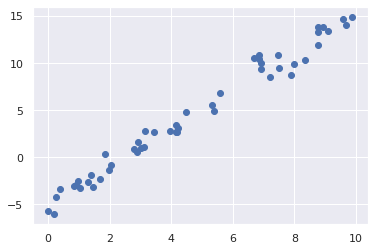

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

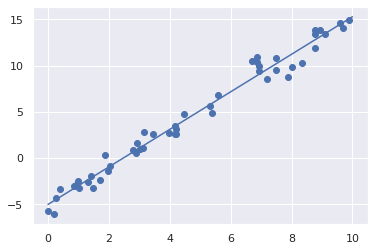

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


**Basis Function Regression**

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.

The idea is to take our multidimensional linear model: $$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$ and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression: $$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$ Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.



**Polynomial basis functions**

This polynomial projection is useful enough that it is built into Scikit-Learn, using the PolynomialFeatures transformer.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4, 5, 6])
poly = PolynomialFeatures(3, include_bias=True)
poly.fit_transform(x[:, None])

array([[  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

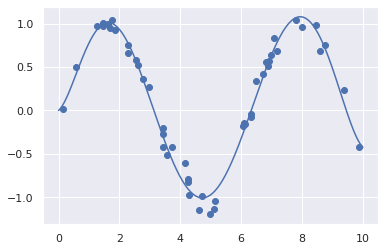

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

ng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
poly_model.steps[1]

('linearregression', LinearRegression())

**Regularization**

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting 

(-1.5, 1.5)

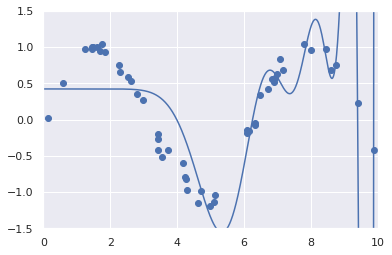

In [ ]:
model = make_pipeline(PolynomialFeatures(23),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [ ]:
model[1].coef_

array([ 0.00000000e+00,  3.65173022e-11,  2.89509102e-14, -5.43202610e-15,
       -2.07771069e-14, -9.18348764e-14, -3.91553641e-13, -1.61007376e-12,
       -6.35571877e-12, -2.38911323e-11, -8.45067377e-11, -2.76478975e-10,
       -8.15481342e-10, -2.08138532e-09, -4.26988443e-09, -5.95315497e-09,
       -2.62747459e-09,  5.64353164e-09, -2.55799693e-09,  5.75753855e-10,
       -7.45218525e-11,  5.66135312e-12, -2.35684978e-13,  4.16463836e-15])

With the data projected to the 23-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data

**Ridge regression** ($L_2$ Regularization)

Perhaps the most common form of regularization is known as ridge regression or $L_2$ regularization, sometimes also called Tikhonov regularization. This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be $$
P = \alpha\sum_{n=1}^N \theta_n^2
$$ where $\alpha$ is a free parameter that controls the strength of the penalty. This type of penalized model is built into Scikit-Learn with the Ridge estimator:

(-1.5, 1.5)

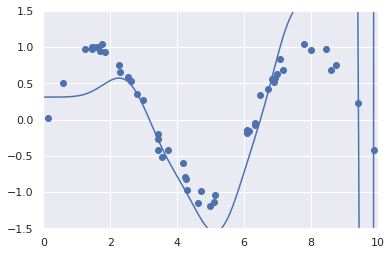

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(23), Ridge(alpha=100))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [ ]:
model[1].coef_

array([ 0.00000000e+00,  3.18855459e-07, -2.28036453e-04,  5.33385842e-03,
        2.07262244e-03,  2.86684126e-03,  3.35475670e-03,  2.93859888e-03,
        1.20886479e-03, -1.16391974e-03, -2.00048932e-03,  6.66891226e-05,
        1.58401830e-03, -9.33710025e-04,  1.40229527e-04,  6.54765282e-05,
       -4.05232648e-05,  1.08802053e-05, -1.80928303e-06,  2.00917456e-07,
       -1.50207636e-08,  7.29679747e-10, -2.08786229e-11,  2.67713726e-13])

**Lasso regression** ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients: $$
P = \alpha\sum_{n=1}^N |\theta_n|
$$ Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.388e+00, tolerance: 2.466e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(-1.5, 1.5)

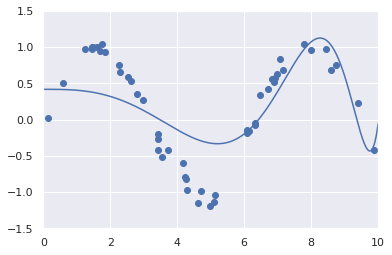

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(23), Lasso(alpha=5))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [ ]:
model[1].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.25627968e-02,
       -5.95619952e-04,  3.61633760e-04,  1.06699829e-05, -4.21263792e-07,
       -9.09344025e-08, -9.30923946e-09, -7.67980979e-10, -5.52717074e-11,
       -3.47159669e-12, -1.75790330e-13, -4.43891175e-15,  4.97599040e-16,
        1.12588297e-16,  1.50658262e-17,  1.70008037e-18,  1.75729591e-19,
        1.71901563e-20,  1.61678772e-21,  1.47437113e-22,  1.30925160e-23])

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions. As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation 

**Model Validation**

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

Holdout Sets :

A good sense of a model's performance can be found using what's known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in Scikit-Learn.


In [ ]:
#dummy code
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

ModuleNotFoundError: ignored

**Model validation via cross-validation:**

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

![alt text](https://github.com/jakevdp/PythonDataScienceHandbook/raw/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-2-fold-CV.png)

![alt text](https://github.com/jakevdp/PythonDataScienceHandbook/raw/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-5-fold-CV.png)

In [ ]:
#dummy code
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

**Selecting the best Model**

Of core importance is the following question: if our estimator is underperforming, how should we move forward? There are several possible answers:

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample


The answer to this question is often counter-intuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.